In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Project Datasets/FinalEval/avocado.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape    #Checking the dimensions of the dataset

(1517, 13)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# Dataset Description

Introduction:

    -> This data was downloaded from the Hass Avocado Board(HAB) website in May of 2018 & compiled into a single CSV file.

    -> Avocado is a fruit consumed by people heavily in the United States.

    -> HAB is the only avocado organization that equips the entire global industry for success by collecting, focusing and     distributing investments to maintain and expand demand for avocados in the United States. 

    -> HAB provides the industry with consolidated supply and market data, conducts nutrition research, educates health        professionals, and brings people together from all corners of the industry to collectively work towards growth that     benefits everyone. The organization also collects and reallocates funds to California and importer associations to      benefit specific countries of origin in promoting their avocado brands to customers and consumers across the United      States.

Details of the dataset:

    -> The table above represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan    data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
     
    -> Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price(of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.              The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
     

->There are totally 1517 rows and 13 columns of the dataset and the details of each column is given below:

1.Date - The date of the observation

2.AveragePrice - the average price of a single avocado

3.Total Volume - Total number of avocados sold

4.4046 - Total number of avocados with PLU 4046 sold

5.4225 - Total number of avocados with PLU 4225 sold

6.4770 - Total number of avocados with PLU 4770 sold

7.Total Bags - Sum total of Small Bags + Large Bags + XLarge Bags

8.Small Bags - Total small bags

9.Large Bags - Total large bags

10.XLarge Bags - Total XLarge bags

11.type - conventional or organic type of avocada

12.year - the year

13.region - the city or region of the observation

# Our agenda in this project

There are 2 agendas in this project. They are:

1.We need to predict the city or region of the observation from the dataset and we need to approach Classification analysis.

2.We need to predict the AveragePrice of the avocados from the dataset and we need to approach Regression analysis.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


As there is a Date column present, we need to convert into datetime format and it can be done by using parse_dates

In [6]:
df=pd.read_csv('D:/Python file/Project Datasets/FinalEval/avocado.csv',parse_dates=['Date'])

In [7]:
df.info()    #Checking the datatype of all the columns present after changing date datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


The column names of 3, 4 and 5 are in numbers and it will cause confusions while doing analysis. We can rename them by using rename() through numpy library

In [8]:
import numpy as np
df=df.rename(columns={'4046':'PLU 4046 sold','4225':'PLU 4225 sold','4770':'PLU 4770 sold','Total Volume':'Total Avocados sold'})
#We are also renaming Total Volume to Total Avocados sold
df.head()

,Date,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.isnull().sum()   #Checking for null values in the dataset

Date                   0
AveragePrice           0
Total Avocados sold    0
PLU 4046 sold          0
PLU 4225 sold          0
PLU 4770 sold          0
Total Bags             0
Small Bags             0
Large Bags             0
XLarge Bags            0
type                   0
year                   0
region                 0
dtype: int64

There are no missing values in the dataset

# Handling the dataframe

We need to analyse the dataset according to days and months so that we can further learn about the dataset. We can split by converting into dataframes separately and concatenating together after splitting.

In [10]:
df1=pd.DataFrame()
df1['month']=df['Date'].dt.month_name()
df1['day']=df['Date'].dt.day_name()
df=df.drop(columns=['Date','type'],axis=1)    #as there is a single type of avocado, we are dropping the column
df.head()

,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [11]:
#Concatenating df and df1 together using concat
df=pd.concat([df1,df],axis=1)
df.head()

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,December,Sunday,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,December,Sunday,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,December,Sunday,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,June,Friday,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,November,Sunday,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


After concatenating, we can see that date has been converted to month and day respectively.

# Exploratory Data Analysis

In [12]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

2015    1270
2016     247
Name: year, dtype: int64


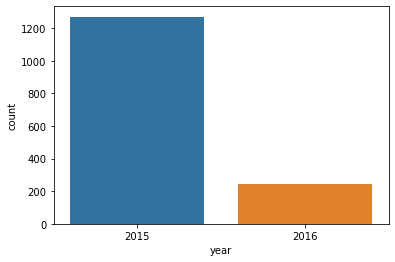

In [13]:
#Checking out total avocado in each year
print(df['year'].value_counts())
sns.countplot(x='year',data=df)
plt.show()

We can see that 1270 records of avocado data are in the year 2015 whereas 247 records of avocado data are in the year 2016

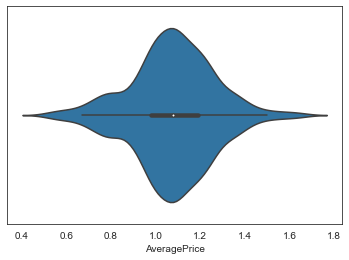

In [14]:
#Checking the distribution of price using violin plot
sns.set_style('white')
sns.violinplot(df['AveragePrice'])
plt.show()

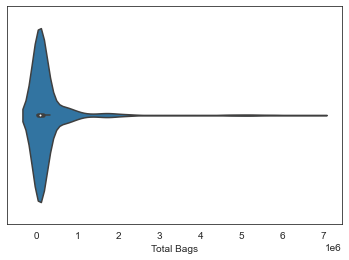

In [15]:
#Checking the distribution of total bags using violin plot
sns.violinplot(df['Total Bags'])
plt.show()

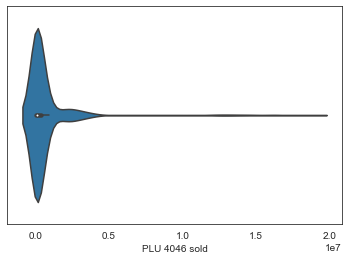

In [16]:
#Checking the distribution of PLU 4046 sold using violin plot
sns.violinplot(df['PLU 4046 sold'])
plt.show()

# Bivariate Analysis

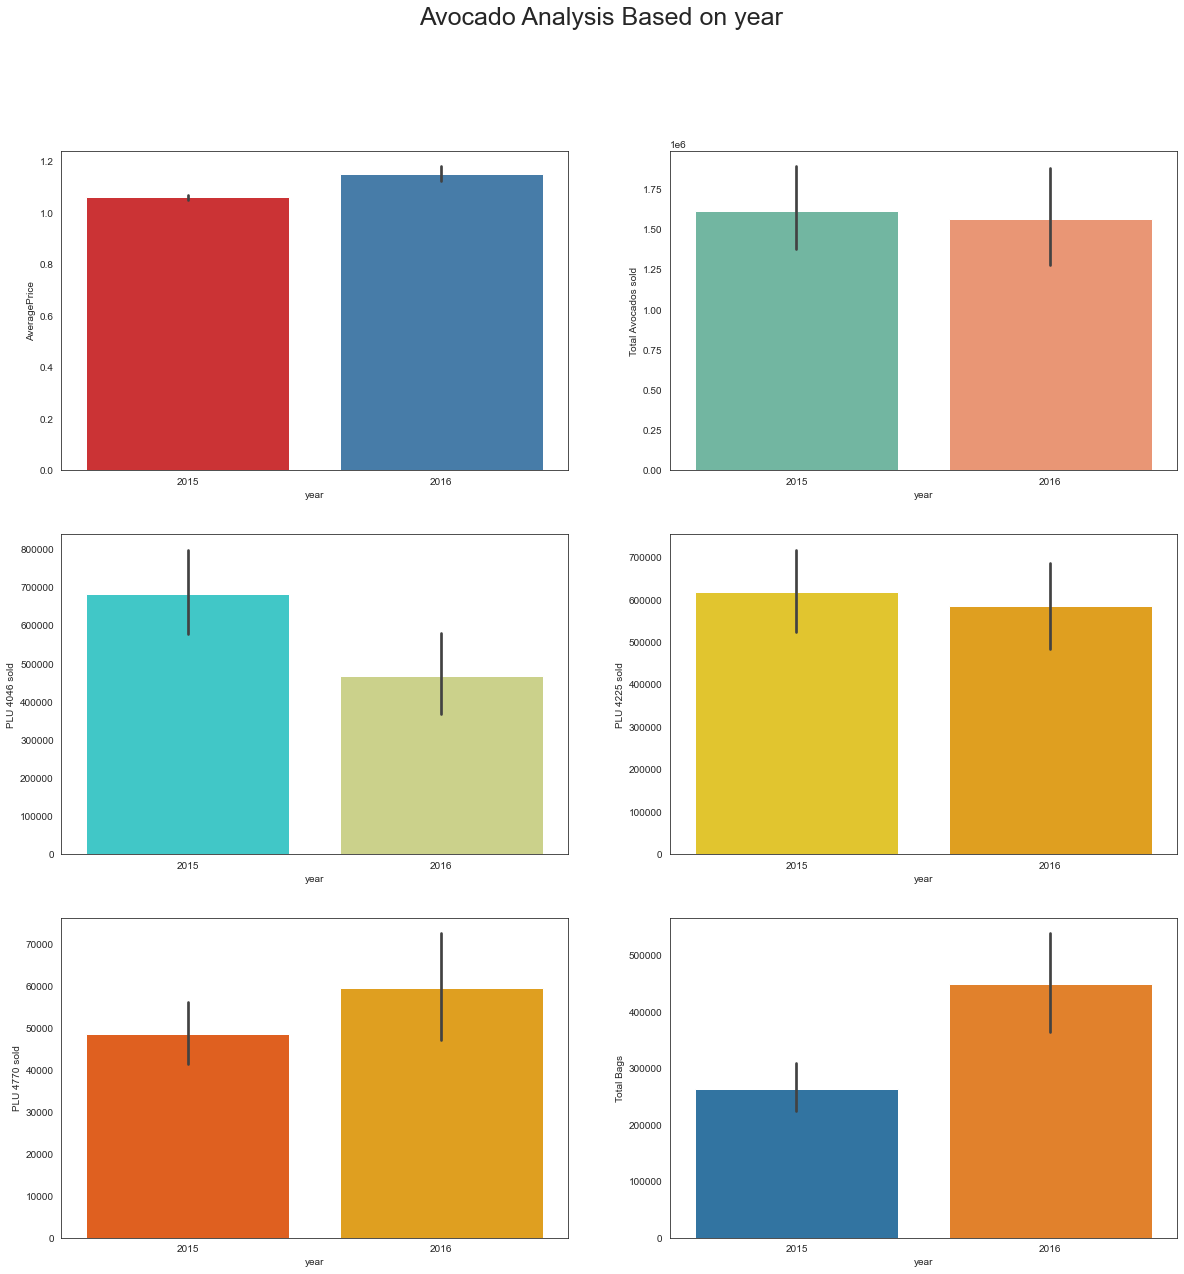

In [17]:
#Plotting year with diffrent data parameters
fig, axes = plt.subplots(3, 2, figsize=(20,20))  #axes is for giving dimensions to the figures we are plotting
#3 means 3 rows and 2 means 2 columns

fig.suptitle('Avocado Analysis Based on year',fontsize=25)  #Adding a centered title to the figure using suptitle
sns.set_style('whitegrid')

#Plotting year vs Average price relationship using barplot
sns.barplot(ax=axes[0, 0],x='year',y='AveragePrice',data=df,palette="Set1")
#ax=axes[0,0] means we are plotting the figure on 0th row and 0th column

#Plotting year vs Total avocados sold relationship using barplot
sns.barplot(ax=axes[0, 1],x='year',y='Total Avocados sold',data=df,palette="Set2")
#ax=axes[0,1] means we are plotting the figure on 0th row and 1st column

#Plotting year vs PLU 4046 sold relationship using barplot
sns.barplot(ax=axes[1, 0],x='year',y='PLU 4046 sold',data=df,palette="rainbow")
#ax=axes[1,0] means we are plotting the figure on 1st row and 0th column

#Plotting year vs PLU 4225 sold relationship using barplot
sns.barplot(ax=axes[1, 1],x='year',y='PLU 4225 sold',data=df,palette="Wistia")
#ax=axes[1,1] means we are plotting the figure on 1st row and 1st column

#Plotting year vs PLU 4770 sold relationship using barplot
sns.barplot(ax=axes[2, 0],x='year',y='PLU 4770 sold',data=df,palette="autumn")
#ax=axes[2,0] means we are plotting the figure on 2nd row and 0th column

#Plotting year vs Total Bags relationship using barplot
sns.barplot(ax=axes[2, 1],x='year',y='Total Bags',data=df)
#ax=axes[2,1] means we are plotting the figure on 2nd row and 1st column

Observations:

1.Maximum average price of avocado is in 2016 and minimum average price in 2015.

2.Maximum avocados were sold in 2015 and minimum number of avocados were sold in 2016.

3.In 2015, PLU 4046 were sold more compared to 2016.

4.In 2015, PLU 4225 were sold more compared to 2016.

5.In 2016, PLU 4770 were sold more compared to 2015.

6.Total number of bags were used more in 2016.

AxesSubplot(0.125,0.657941;0.775x0.222059)
AxesSubplot(0.125,0.391471;0.775x0.222059)
AxesSubplot(0.125,0.125;0.775x0.222059)


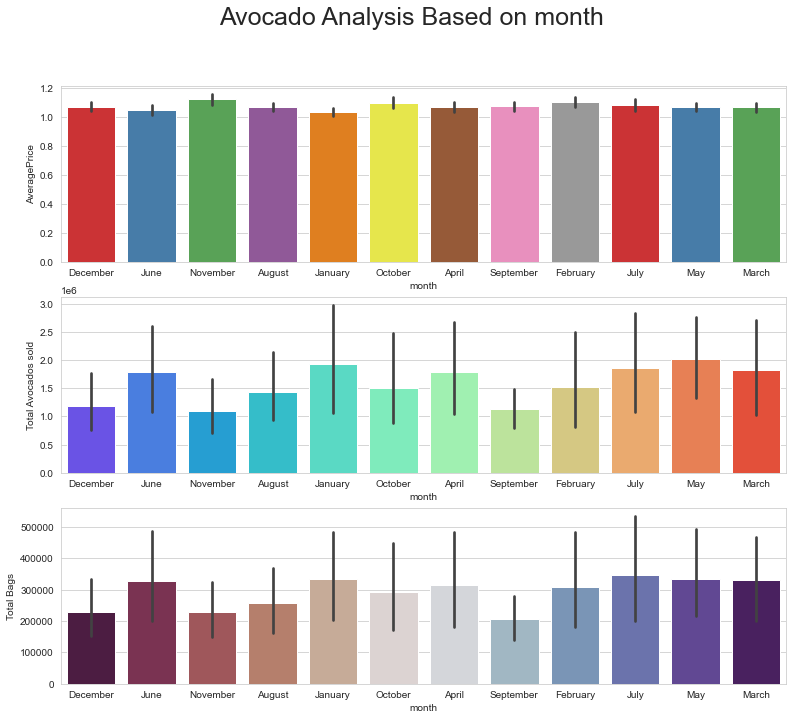

In [18]:
plt.figure(figsize = (13,11))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.suptitle('Avocado Analysis Based on month',fontsize=25)
plt.subplot(311)
print(sns.barplot(x='month',y='AveragePrice',data=df,palette="Set1"))

plt.subplot(312)
print(sns.barplot(x='month',y='Total Avocados sold',data=df,palette="rainbow"))

plt.subplot(313)
print(sns.barplot(x='month',y='Total Bags',data=df,palette="twilight_shifted_r"))

Observations:

1.We can observe the average price of avocados is higher in the month of November, while lesser in the month of January.

2.Maximum number of avocados were sold in the month of May, whereas minimum number of avocados were sold in November. 

3.Maximum number of bags were used in July, whereas minimum number of bags were used in September.

Text(0, 0.5, 'Total Avocados sold')

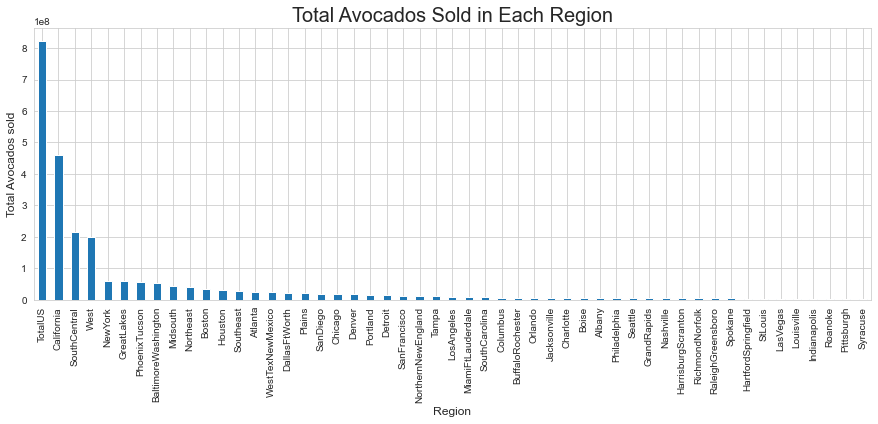

In [19]:
#Checking the ratio of total avocados sold in Each region
plt.figure(figsize=(15,30))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Total Avocados Sold in Each Region',{'fontsize':20})
df.groupby("region")["Total Avocados sold"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Total Avocados sold',{'fontsize':'large'})

We can see that more number of avocados were sold in TotalUS region and less number of avocados were sold in regions like Albany, Boise, Seattle, etc.

Text(0, 0.5, 'Total Avocados sold')

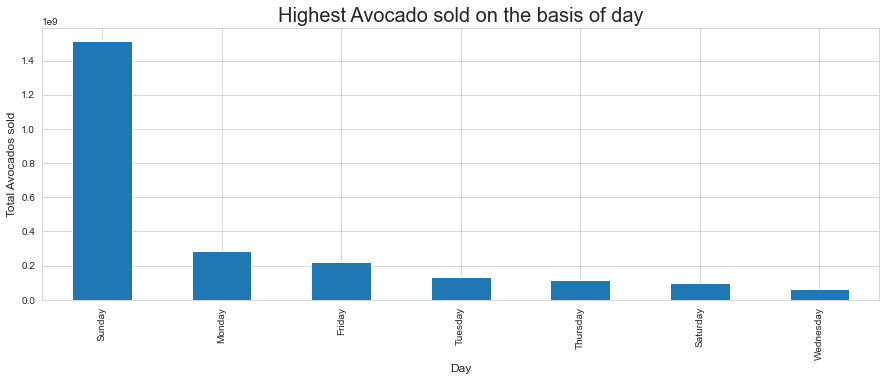

In [20]:
# lets check the which week got highest Avocado sell in year 2018.
df.groupby("day")["Total Avocados sold"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Highest Avocado sold on the basis of day',{'fontsize':20})
plt.xlabel('Day',{'fontsize' : 'large'})
plt.ylabel('Total Avocados sold',{'fontsize':'large'})

More avocados were sold on Sundays, whereas minimum number of avocados were sold on Wednesday.

Text(0.5, 1.0, 'Average price in different regions')

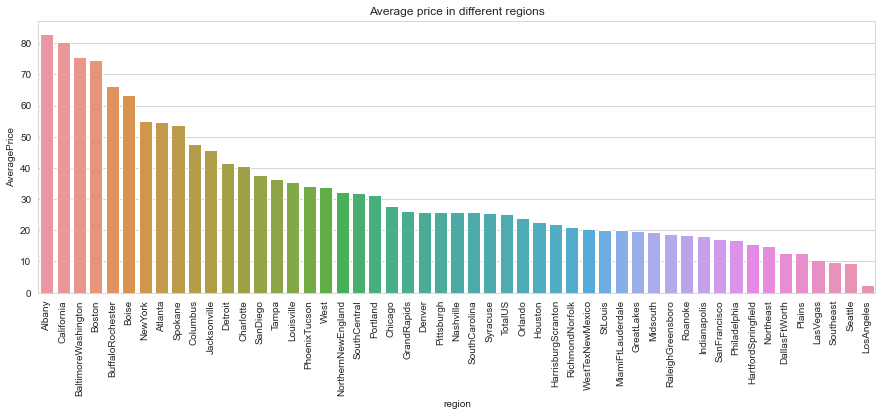

In [21]:
#How Average price varies by comparing with different regions
region = df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).reset_index()
# Visualizing by bar plot
plt.figure(figsize=(15,5))
ax = sns.barplot(region['region'],region['AveragePrice'])
plt.xticks(rotation= 90)
plt.title("Average price in different regions")

The average price in Albany is maximum whereas the average price in LosAngeles is minimum

# Multivariate Analysis

In [22]:
df.describe()    #Statistical summary of the dataset

,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observations:

1.There is not much difference between the mean and median values.

2.The standard deviation value for XLarge Bags is high.

3.There can be outliers present in this dataset as the difference between the 75th percentile and max values are bit higher for some columns.

In [23]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Avocados sold,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
PLU 4046 sold,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
PLU 4225 sold,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
PLU 4770 sold,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


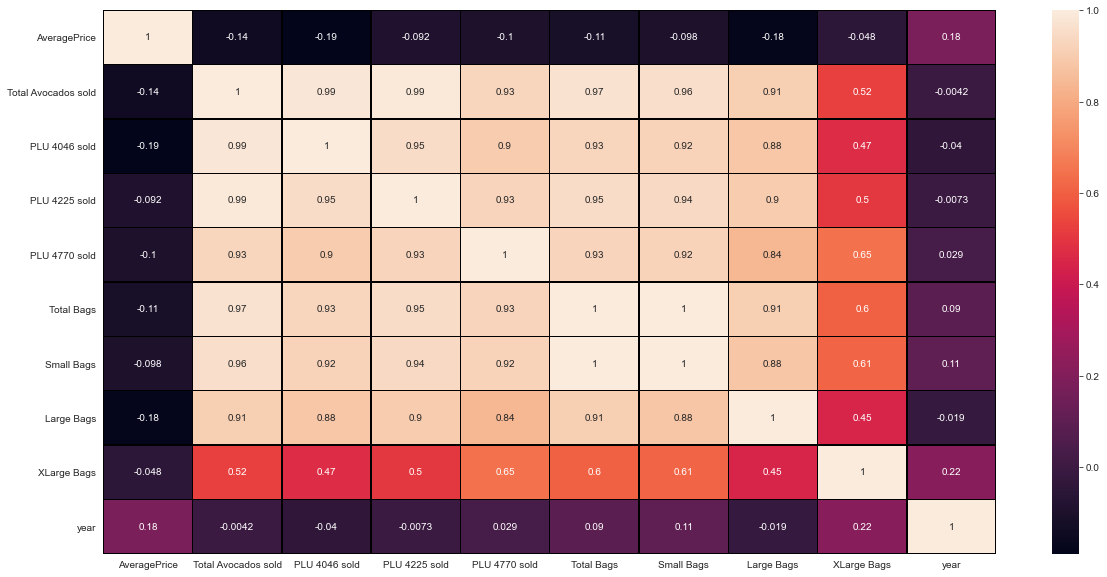

In [24]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.Most of the columns are highly positive correlated with each other

2.PLU 4046 sold, PLU 4225 sold and Total Avocados sold are the columns that are having a value of 99%.

3.Year column is the most negatively correlated column among all but the values are very less.

4.Positively correlated columns have high impact with the target variable, whereas negatively correlated columns have less or zero impact with the target variable.

# Converting categorical data into numerical data

In [25]:
df.dtypes

month                   object
day                     object
AveragePrice           float64
Total Avocados sold    float64
PLU 4046 sold          float64
PLU 4225 sold          float64
PLU 4770 sold          float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                  object
dtype: object

Month, day, type and region are the columns that are having categorical data. We need to convert them into numerical data and it can be done by using LabelEncoder.

In [26]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Taking the columns to be converted
col=['month','day','region','year']
for i in col:
    df[i]=le.fit_transform(df[i])

In [27]:
df.head()  #Checking out the dataset after conversion

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2,3,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,2,3,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2,3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,6,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,9,3,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [28]:
df.dtypes  #Checking out the datatypes after conversion

month                    int32
day                      int32
AveragePrice           float64
Total Avocados sold    float64
PLU 4046 sold          float64
PLU 4225 sold          float64
PLU 4770 sold          float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                   int32
dtype: object

We can see that the required categorical data has been converted into numerical data using LabelEnocding Technique.

# Checking skewness

In [29]:
df.skew()

month                 -0.017524
day                   -0.396612
AveragePrice          -0.109444
Total Avocados sold    6.200138
PLU 4046 sold          6.051830
PLU 4225 sold          6.394926
PLU 4770 sold          5.405164
Total Bags             5.366378
Small Bags             5.355185
Large Bags             5.144495
XLarge Bags            5.775077
year                   1.828332
region                 0.288146
dtype: float64

Bags column, PLU columns, Total Avocados sold and year columns have heavy skewness in their data.

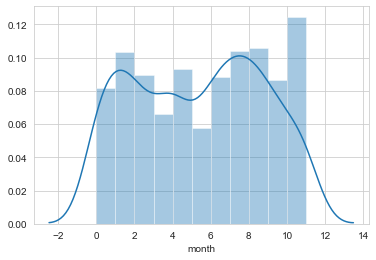

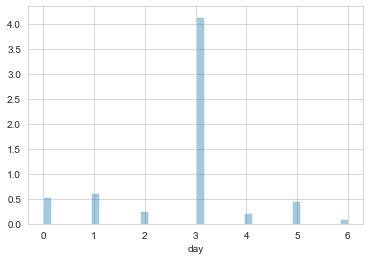

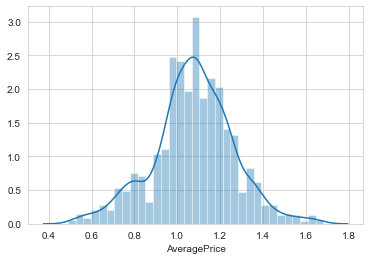

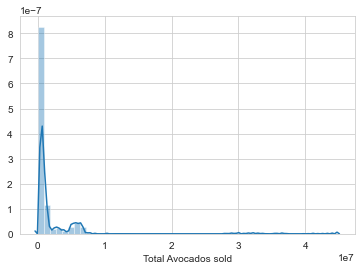

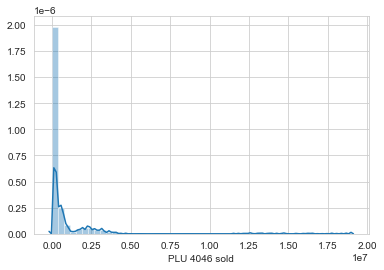

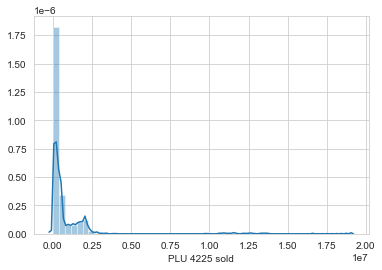

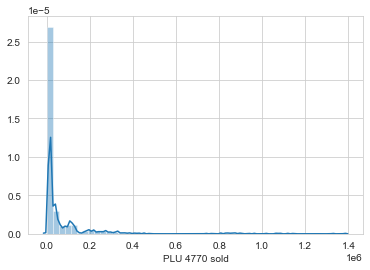

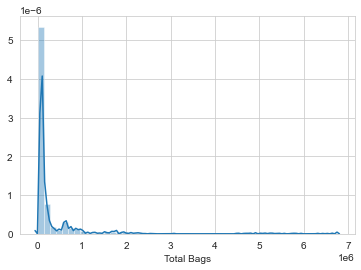

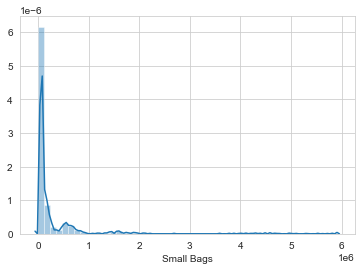

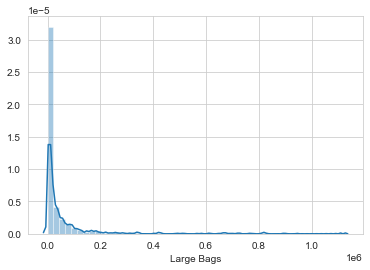

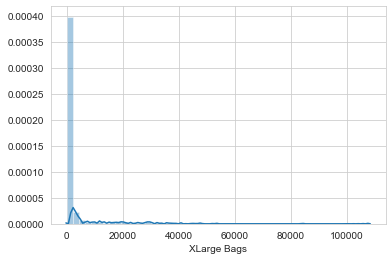

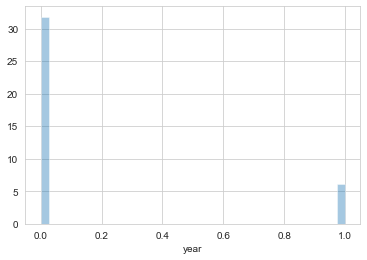

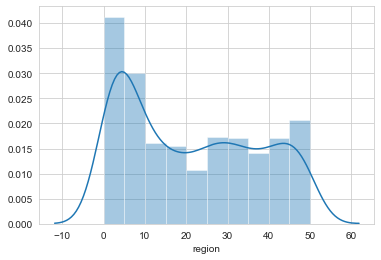

In [30]:
#Checking distribution of data using distribution plot
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

We can see that the data is not normally distributed in most of the columns and it is skewed due to the presence of outliers.

# Checking outliers

We can check the presence of outliers by plotting boxplot

In [31]:
collist=df.columns.values 
ncol=10
nrows=10

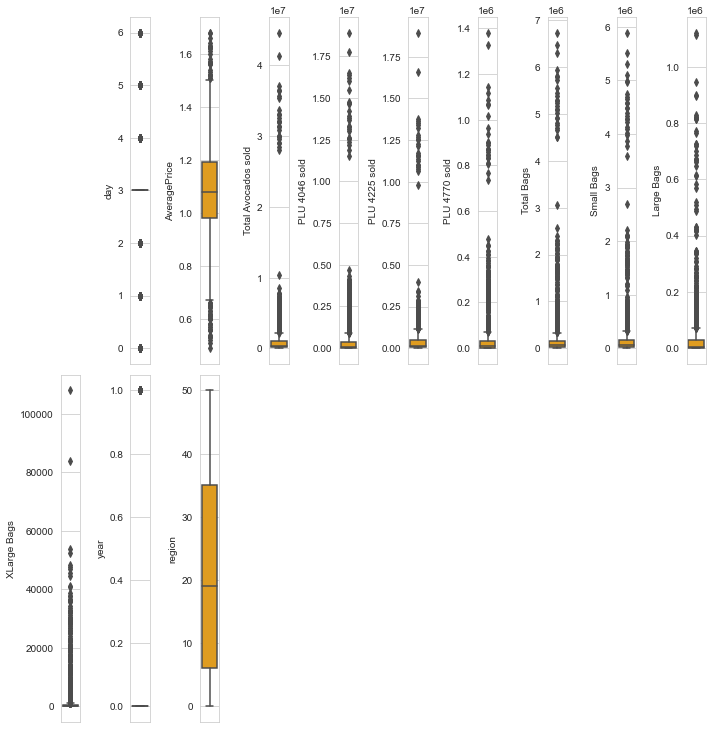

In [32]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

As we can see, there are more number of outliers present in the dataset and we can remove them by using z-score method

# Handling outliers using z-score method

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [34]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2,3,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,2,3,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,2,3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,6,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,9,3,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,3,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,7
1513,11,2,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,7
1514,3,6,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,7
1515,11,3,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,7


In [35]:
df.shape   #Original dataset dimensions

(1517, 13)

In [36]:
df_new.shape   #New dataset dimensions

(1436, 13)

Nearly 80 rows had outliers and they are removed by using z-score method

# Percentage loss of data after removing outliers

In [37]:
percentage_loss=((81)/1517)*100   #81 = 1517-1436
print(percentage_loss)

5.339485827290705


Nearly 5% of the data has been lost due to the removal of the outliers

# Further Analysis to do

As per the agenda of this project, we need to do 2 types of prediction. They are:

1.Predicting the city or region of the observation from the dataset and we need to approach by using Classification analysis.

2.Predicting the AveragePrice of the avocados from the dataset and we need to approach by using Regression analysis.

# Classification Analysis

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [38]:
df_x=df_new.drop('region',axis=1)   #Independent variables
y=df_new['region']    #Dependent or Target Variable

In [39]:
#Checking x data
df_x.head()

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,2,3,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,2,3,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,6,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,9,3,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [40]:
#Checking y data after splitting
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1436, dtype: int32

# Treating skewness using log-transform

In [41]:
#We are removing skewness from independent variables by using log-transform
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])
        
#The skewness has been treated and the data is ready for model training and testing        

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [42]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-0.983631,0.204723,1.344989,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870
1,-0.983631,0.204723,1.451388,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870
2,-0.983631,0.204723,-0.782987,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870
3,0.202342,-2.178912,0.015004,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870
4,1.091822,0.204723,1.078992,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.388316,0.204723,1.664186,-0.548521,-0.020619,-0.485823,0.586167,-0.189379,-0.193283,0.494754,0.946229,2.416215
1432,1.684809,-0.589822,2.302579,-0.602663,-0.149612,-0.535121,0.627966,-0.135593,-0.097945,0.438844,-0.775528,2.416215
1433,-0.687138,2.588357,2.142980,-0.601885,-0.118772,-0.526545,0.567203,-0.147557,-0.119231,0.426777,1.332463,2.416215
1434,1.684809,0.204723,2.089781,-0.555668,-0.048487,-0.518124,0.585318,-0.127164,-0.083522,0.427507,-0.775528,2.416215


We can see that the data has been scaled and updated to a new DataFrame

# Building the model

In [43]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [44]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training accuracy_score is: ',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is: ',accuracy_score(y_test,pred_test)*100)

At random state 648 ,the model performs well
Training accuracy_score is:  95.1219512195122
Testing accuracy_score is:  95.13888888888889


We can see that at random_state=648, the maximum accuracy score is obtained so that we can create our train_test_split with that value.

In [45]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=648,test_size=.25)

# Finding out the best model

We are going to use LogisticRegression, SVC, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those

In [46]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Initializing the instance of the model
LR=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [48]:
models= []
models.append(('Logistic Regression',LR))
models.append(('SupportVectorClassifier',svc))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [49]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [50]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)    
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9275766016713092


cross_val_score:  0.8621685056136276


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.80      0.92      0.86        13
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         9
           5       1.00      0.92      0.96        13
           6       1.00      1.00      1.00         7
           7       0.67      1.00      0.80         4
           8       0.83      1.00      0.91         5
           9       0.92      1.00      0.96        12
          10       1.00      0.83      0.91         6
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        11
          13       1.00      1.00    




Confusion matrix: 

[[15  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  5]]




****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9052924791086351


cross_val_score:  0.8189871273712737


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      0.92      0.96        13
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        15
           4       0.75      1.00      0.86         9
           5       1.00      1.00      1.00        13
           6       0.88      1.00      0.93         7
           7       0.60      0.75      0.67         4
           8       0.67      0.80      0.73         5
           9       1.00      1.00      1.00        12
         

In [51]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,92.757660,86.216851
1,SupportVectorClassifier,85.236769,82.665021
2,GaussianNB,89.415042,84.551152
3,DecisionTreeClassifier,90.529248,81.898713
4,KNeighborsClassifier,78.830084,74.236595


From the above algorithms used, we can say that LogisticRegression is working well by giving an accuracy score of 92.75 and cross validation score of 86.21. Now, we will perform HyperparameterTuning to improve the accuracy of the model.

# Hyperparameter Tuning 

In [52]:
#Creating parameter list to pass in GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[10, 1, 0.1, 0.01,0.001,0.001],'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [53]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9322006890611542


In [54]:
#Using the best parameters
LR=LogisticRegression(C=10,penalty='l2',solver='newton-cg')
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()*100)

Final Accuracy after tuning is:  95.82172701949861
Cross validation score:  91.02037359659312


After Hyperparameter Tuning, we can see that our accuracy score has been increased from 92.75 to 95.82 and our cross validation score has been improved from 86.21 to 91.02. LogisticRegression is the best performing model and we are finalizing it.

# Finalizing the model

In [55]:
LR_prediction=LR.predict(x)
print('Predictions of LogisticRegression: ',LR_prediction)

Predictions of LogisticRegression:  [0 0 0 ... 7 7 7]


In [56]:
#Saving the model
import joblib
joblib.dump(LR,'Avocado_Classification.obj')

['Avocado_Classification.obj']

# Saving the predicted values

In [57]:
results=pd.DataFrame(LR_prediction)
results.to_csv('Avocado_Project_Classification_Results.csv')

Therefore, the classification analysis of avocado project has been done and the LogisticRegression model has been finalized for production and the predicted results has been saved in a DataFrame.

# Regression Analysis

# Preparing dataset for model training

In [58]:
df_new

,month,day,AveragePrice,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2,3,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,2,3,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,2,3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,6,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,9,3,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,3,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,7
1513,11,2,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,7
1514,3,6,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,7
1515,11,3,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,7


We need to split independent and dependent variables from the dataset in order to perform further analysis

In [59]:
df_x=df_new.drop('AveragePrice',axis=1)   #Independent variables
y=df_new['AveragePrice']    #Dependent or Target Variable

In [60]:
#Checking x data
df_x.head()

,month,day,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2,3,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,2,3,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2,3,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,6,0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,9,3,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [61]:
#Checking y data after splitting
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

# Treating skewness using log-transform

In [62]:
#We are removing skewness from independent variables by using log-transform
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])
        
#The skewness has been treated and the data is ready for model training and testing        

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [63]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,month,day,Total Avocados sold,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-0.983631,0.204723,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870,-1.322817
1,-0.983631,0.204723,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870,-1.322817
2,-0.983631,0.204723,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870,-1.322817
3,0.202342,-2.178912,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870,-1.322817
4,1.091822,0.204723,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870,-1.322817
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.388316,0.204723,-0.548521,-0.020619,-0.485823,0.586167,-0.189379,-0.193283,0.494754,0.946229,2.416215,-0.879305
1432,1.684809,-0.589822,-0.602663,-0.149612,-0.535121,0.627966,-0.135593,-0.097945,0.438844,-0.775528,2.416215,-0.879305
1433,-0.687138,2.588357,-0.601885,-0.118772,-0.526545,0.567203,-0.147557,-0.119231,0.426777,1.332463,2.416215,-0.879305
1434,1.684809,0.204723,-0.555668,-0.048487,-0.518124,0.585318,-0.127164,-0.083522,0.427507,-0.775528,2.416215,-0.879305


We can see that the data has been scaled and updated to a new DataFrame

# Building the model

In [64]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [65]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 171 ,the model performs well
Training r2_score is:  39.76973665723187
Testing r2_score is:  39.83080147724576
At random state 322 ,the model performs well
Training r2_score is:  39.786705284392355
Testing r2_score is:  39.754713413028774
At random state 348 ,the model performs well
Training r2_score is:  39.873413357365216
Testing r2_score is:  39.91829205263324
At random state 699 ,the model performs well
Training r2_score is:  39.7564979137652
Testing r2_score is:  39.7945668231689
At random state 962 ,the model performs well
Training r2_score is:  39.800751859777506
Testing r2_score is:  39.82031636813114


We can see that at random_state=348 it is giving good r2_score so that we can create train_test_split with this random state

In [66]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=348,test_size=.25)

# Finding the best model

We are going to use LinearRegression, SVR, DecisionTreeRegressor and KNeighborsRegressor algorithms for finding out the best model among those

In [67]:
#Importing the models we are going to use
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [68]:
LR=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [69]:
models= []
models.append(('Linear Regression',LR))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [70]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [71]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.39895547144153554


cross_val_score:  0.03379280363613544


Mean Absolute Error:  0.11770189161531522


Mean Squared Error:  0.02227032620032355


Root Mean Squared Error:  0.14923245692651296



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  0.740011337292824


cross_val_score:  0.16085874239139578


Mean Absolute Error:  0.0782950032665745


Mean Squared Error:  0.009633283478615844


Root Mean Squared Error:  0.09814929178866165



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.7085007594563275


cross_val_score:  -0.4042827679206221


Mean Absolute Error:  0.07194986072423398


Mean Squared Error:  0.0108008356545961


Root Mean Squared Error:  0.10392706892141286



****************************** KNeighbors Regressor **

In [72]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Mean_absolute_error':mae,
                     'Mean_squared_error':mse,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,39.895547,3.379280,0.117702,0.022270,0.149232
1,Support Vector Regressor,74.001134,16.085874,0.078295,0.009633,0.098149
2,Decision Tree Regressor,70.850076,-40.428277,0.071950,0.010801,0.103927
3,KNeighbors Regressor,66.881897,-15.976389,0.080535,0.012271,0.110775


The best model from the above algorithms is Support Vector Regressor which is giving an accuracy score of 74 and cross validation score of 16.08 and its RMSE score is also less. Lesser the RMSE score, the better model we can build.
Now we will try to find the best parameters and increase the accuracy score of the model by using Hyperparameter Tuning.

# Hyperparameter Tuning

In [73]:
#Creating parameter list to pass in GridSearchCV
parameters={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],'C':[10, 1, 0.1, 0.01,0.001,0.001]}

In [74]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
svr=SVR()
grid=GridSearchCV(svr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.6466591427587786


In [75]:
#Using the best parameters
svr=SVR(C=1,gamma='scale',kernel='rbf')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('Final Accuracy after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(svr,x,y,cv=5,scoring='r2').mean()*100)

Final Accuracy after tuning is:  74.0011337292824
Cross validation score:  16.085874239139578


We can see that the accuracy and cross validation score could not be increased after finding out the best parameters to use for increasing. Now, we will try Ensemble Techniques to boost up our scores

# Ensemble Techniques for boosting the score

In [76]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=348)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['mse', 'mae']}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'n_estimators': 1200}
0.7670540520727585


In [77]:
#Using the best parameters obtained
rfr=RandomForestRegressor(random_state=348,criterion='mse',n_estimators=1200)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print('Accuracy score: ',r2_score(y_test,rfr_pred)*100)
print('Cross validation score: ',cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()*100)
print('Mean absolute error: ',mean_absolute_error(y_test,rfr_pred))
print('Mean squared error: ',mean_squared_error(y_test,rfr_pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,rfr_pred)))

Accuracy score:  85.53528651160501
Cross validation score:  15.46641727373268
Mean absolute error:  0.05490835654596138
Mean squared error:  0.005359567760368389
Root Mean squared error:  0.07320906883964848


In [78]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=348)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square','exponential']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 1000}
0.6241561277721062


In [79]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=348,n_estimators=1000,learning_rate=1,loss='square')
adr.fit(x_train,y_train)
adr_pred=adr.predict(x_test)
print("Accuracy score: ",r2_score(y_test,adr_pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Mean absolute error: ',mean_absolute_error(y_test,adr_pred))
print('Mean squared error: ',mean_squared_error(y_test,adr_pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,adr_pred)))

Accuracy score:  64.2426519487394
Cross validation score:  8.808399450458593
Mean absolute error:  0.09583991784596319
Mean squared error:  0.013249065041320271
Root Mean squared error:  0.11510458305958225


After applying Ensemble Techniques, we can see that both the models are not good as the difference between the accuracy score and cross validation score is huge, eventhough we obtained good accuracy score. RandomForestRegressor algorithm is performing well on the basis of highest accuracy score, which is 85.53, and low RMSE score, which is 0.073. Now, we will try Regularization Techniques for improving the scores and getting a good fit model.

# Regularization Techniques

# Lasso(L1)

In [80]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)  #Finding out the best parameters

{'alpha': 0.0001, 'random_state': 0}


In [81]:
#Initializing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

In [82]:
ls=Lasso(alpha=0.0001,random_state=0)   #Using best alpha and best random state value
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv: ',j)
    print('Cross validation score is: ',lsc*100)
    print('r2_score is: ',lss*100)
    print('\n')

At cv:  2
Cross validation score is:  -23.24200186520792
r2_score is:  40.32167513597715


At cv:  3
Cross validation score is:  11.833848415198817
r2_score is:  40.32167513597715


At cv:  4
Cross validation score is:  8.773708406154185
r2_score is:  40.32167513597715


At cv:  5
Cross validation score is:  3.2848485524602884
r2_score is:  40.32167513597715


At cv:  6
Cross validation score is:  -4.577136761297116
r2_score is:  40.32167513597715


At cv:  7
Cross validation score is:  -32.33585288872659
r2_score is:  40.32167513597715


At cv:  8
Cross validation score is:  1.7360409751627865
r2_score is:  40.32167513597715


At cv:  9
Cross validation score is:  5.793757809016986
r2_score is:  40.32167513597715




We are getting the best values at cv=3

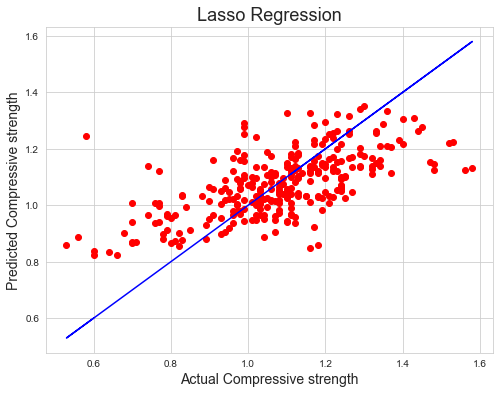

In [83]:
#Plotting for Lasso
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Lasso Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

We can see from the graph that some data points are either on the best fit line or near to the line while other data points are either above the  best fit line or below the best fit line. Very few data points are very far away from the line, which is bad and because of this the scores are getting affected.

In [84]:
#Calculating the MAE, MSE and RMSE
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Mean Absolute Error:  0.11092728533571379
Mean Squared Error:  0.02090177782853629
Root Mean Squared Error:  0.14457447156582068


# Ridge(L2)

In [85]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[.0001,.001,.01,.1,1],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.0001}


In [86]:
#Using the best parameters in rd
rd=Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True,random_state=0,tol=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
print('r2_score: ',rds*100)

rdscore=cross_val_score(rd,x,y,cv=3)
rdc=rdscore.mean()
print('Cross val score: ',rdc)

r2_score:  40.287691918270326
Cross val score:  -124.26097679716558


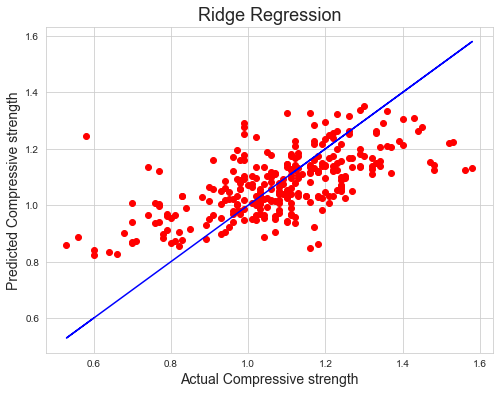

In [87]:
#Plotting for Ridge
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Ridge Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

We can see from the graph that some data points are either on the best fit line or near to the line while other data points are either above the  best fit line or below the best fit line. Very few data points are very far away from the line, which is bad and because of this the scores are getting affected. More affect of data points are in Ridge regression and it can be seen through the errors we obtain.

In [88]:
#Calculating the MAE, MSE and RMSE
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Mean Absolute Error:  0.11093644378980498
Mean Squared Error:  0.02091368013423983
Root Mean Squared Error:  0.14461562894182575


Even after using Hyperparameter Tuning, Ensemble Techniques and Regularization, the model seems to be underfit for Regression Analysis as the difference between the r2_score and cross validation score is high. The best performing algorithm is the Random Forest Regressor model which is giving an accuracy score of 85.53 and RMSE score of 0.073, which is less among all. In Regularization techniques we used, we can see that there are more errors obtained which is bad for the model and it affects the performance.

# Finalizing the model

In [89]:
rfr_prediction=rfr.predict(x)
print('Predictions of Random Forest Regressor: ',rfr_prediction)

Predictions of Random Forest Regressor:  [1.31114167 1.32258333 0.990925   ... 1.282825   1.43326667 1.42574167]


In [90]:
#Saving the model
import joblib
joblib.dump(rfr,'Avocado_Regression.obj')

['Avocado_Regression.obj']

# Saving the predicted values

In [91]:
reg_result=pd.DataFrame(rfr_prediction)
reg_result.to_csv('Avocado_Project_Regression_Results.csv')

Therefore, the regression analysis of the Avocado project has been done and the RandomForestRegressor model has been finalized for production and the predicted results has been saved in a DataFrame.

# Conclusion

-> After getting the insight of avocados dataset, we came to various conclusions that how much avocados has been sold in US        every year.

-> We had applied lots of techniques to visulalize the entire dataset and got more indepth information about the avocados .

-> This dataset was used to predict 2 datas: One was to predict the average price of avocados and the other was to predict the      city or region of the avocados sold.

-> We had forecasted the yearly, monthly and day basis sales of avocados in different US regions, and we had also observed that    how the columns are correlated with each other using heatmap.

-> We did complete EDA process in the dataset to analyze the data and we also recorded our observations after each process. 

-> We applied various algorithms and saved the best model on the basis of accuracy score, cross validation score and RMSE score,    as we know that lower the RMSE score, better the model will perform. 

-> We applied various regression algorithms to predict the Average price of Avocados, and we found that RandomForest Regressor     is working well, on the basis of r2_score and less RMSE score.

-> Eventhough we applied techniques like Hyperparameter Tuning, Ensemble techniques and Regularization techniques we could not     increase the score as there were insufficient and bad data in the dataset.

-> We selected RandomForest Regressor as the final model because the RMSE score was very less and the accuracy score was the        highest among all.

-> The model was considered to be underfit during Regression analysis as the difference between r2_score and cross validation     score was high in all the techniques we used and because of this we can conclude that more data is required for achieving good   scores as some of the cross validation scores were negative, which is bad. Even in the regularization graph, we can see that     all the datapoints are not in the same place and they are spread everywhere. This dataset can be improved for Regression         analysis by adding more data, using less outliers, giving more accurate information to the target variable, having less         skewness, etc.

-> After we finalised the model, we saved it in an obj file and also we tested the model and saved the predicted result to a csv    file.

-> We applied classification algorithms to predict the city or region and we found that LogisticRegression algorithm was working    well as it obtained maximum Accuracy score and cross validation score and the difference between them was very less. 

-> We got a best fit model during Classification analysis as the difference between the accuracy score and cross validation       score was very less and we also tried to increase the accuracy by finding the best parameter during Hyperparameter Tuning       technique.

-> After tuning the model, it gave an excellent increase in the accuracy score from 92.75 to 95.82 and also it gave a very good   cross validation score. We concluded that this is the best model and we finalized the model.

-> We saved that model, tested the predicted values and saved it to a csv file and dumped the file in obj format.

-> Therefore, we can conclude that this dataset is good for predicting the city or region using classification analysis whereas    for predicting the average price using Regression analysis, the dataset must be improved by adding more good data with less      skewness, less missing values, less number of errors in the data and with less number of outliers.